In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv("dataset/train.csv", sep=";")
df_test = pd.read_csv("dataset/test.csv", sep=";")
df_eval = pd.read_csv("dataset/evaluation.csv", sep=";")

In [4]:
df = pd.concat([df_train, df_test, df_eval], ignore_index=True)
df.info
# label: 1 - Fake; 0 - Not fake  

<bound method DataFrame.info of        Unnamed: 0                                              title  \
0               0  Palestinians switch off Christmas lights in Be...   
1               1  China says Trump call with Taiwan president wo...   
2               2   FAIL! The Trump Organization’s Credit Score W...   
3               3  Zimbabwe military chief's China trip was norma...   
4               4  THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...   
...           ...                                                ...   
40582        8112   Sean Hannity Throws Hissy Fit After Real Repo...   
40583        8113  FORMER ASST FBI DIRECTOR WARNS ANTI-TRUMP KABA...   
40584        8114   John McCain: Trump’s Attacks On The Press Are...   
40585        8115  Syria's Deir al-Zor air base working again: st...   
40586        8116  U.S. military releases, withdraws old Islamist...   

                                                    text  label  
0      RAMALLAH, West Bank (Reuters) 

In [5]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label          int64
dtype: object

In [6]:
df.label.value_counts()

label
1    21924
0    18663
Name: count, dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [8]:
df = df.drop(columns=['Unnamed: 0'])
df['content'] = df['title'] + " " + df['text']

In [9]:
df.head()

,title,text,label,content
0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1,Palestinians switch off Christmas lights in Be...
1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1,China says Trump call with Taiwan president wo...
2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0,FAIL! The Trump Organization’s Credit Score W...
3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1,Zimbabwe military chief's China trip was norma...
4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...


In [10]:
import seaborn as sb
import matplotlib.pyplot as plt

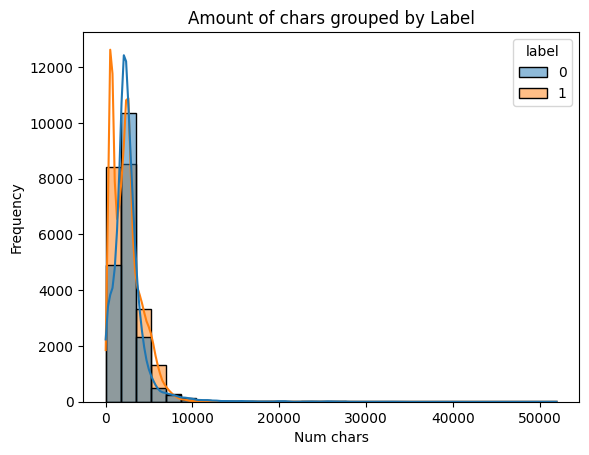

In [11]:
df['text_length'] = df['content'].apply(lambda x : len(str(x)))
sb.histplot(data=df, x='text_length', hue = 'label', bins=30, kde=True)
plt.title("Amount of chars grouped by Label")
plt.xlabel('Num chars')
plt.ylabel("Frequency")
plt.show()

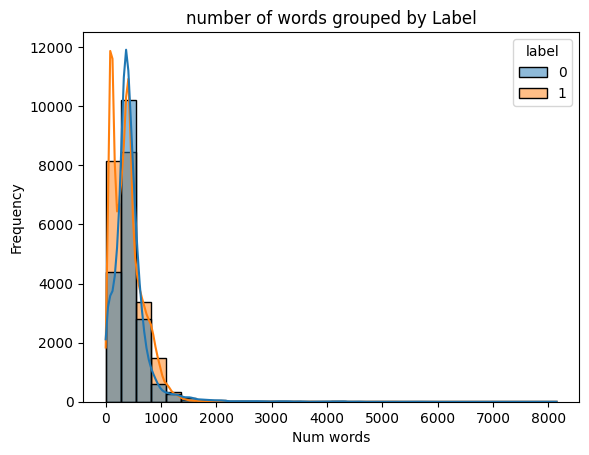

In [12]:
df['num_words'] = df['content'].apply(lambda x : len(str(x).split()))
sb.histplot(data=df, x='num_words', hue = 'label', bins=30, kde=True)
plt.title("number of words grouped by Label")
plt.xlabel('Num words')
plt.ylabel("Frequency")
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

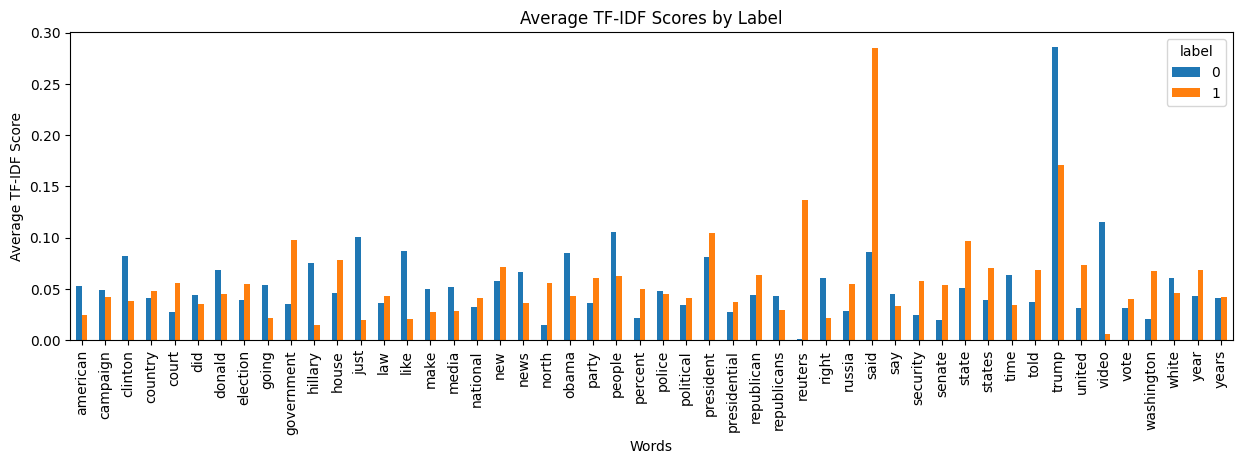

In [14]:
tfidf = TfidfVectorizer(stop_words='english', max_features=50)
tfidf_matrix = tfidf.fit_transform(df['content'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

tfidf_df['label'] = df['label']

tfidf_avg = tfidf_df.groupby('label').mean().T

tfidf_avg.plot(kind='bar', figsize=(15,4))
plt.title('Average TF-IDF Scores by Label')
plt.ylabel('Average TF-IDF Score')
plt.xlabel('Words')
plt.show()

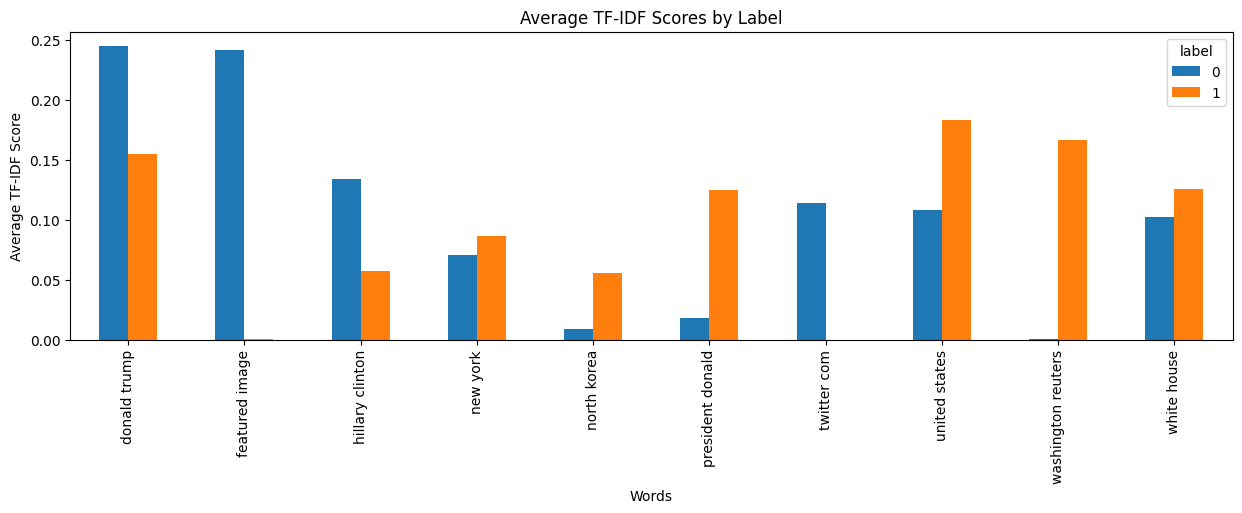

In [15]:
tfidf2 = TfidfVectorizer(stop_words='english', max_features=10, ngram_range=(2, 2))
tfidf_matrix2 = tfidf2.fit_transform(df['content'])
tfidf_df2 = pd.DataFrame(tfidf_matrix2.toarray(), columns=tfidf2.get_feature_names_out())

tfidf_df2['label'] = df['label']

tfidf_avg2 = tfidf_df2.groupby('label').mean().T

tfidf_avg2.plot(kind='bar', figsize=(15,4))
plt.title('Average TF-IDF Scores by Label')
plt.ylabel('Average TF-IDF Score')
plt.xlabel('Words')
plt.show()

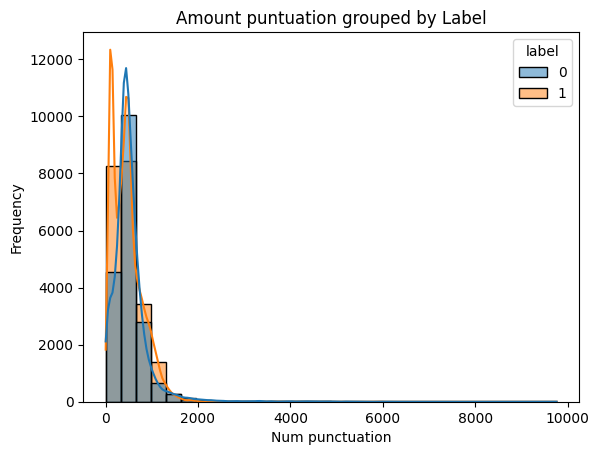

In [16]:
punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ 1234567890'
df['punctuation'] = df['content'].apply(lambda x : len([letter for letter in str(x) if letter in punctuation]))
sb.histplot(data=df, x='punctuation', hue = 'label', bins=30, kde=True)
plt.title("Amount puntuation grouped by Label")
plt.xlabel('Num punctuation')
plt.ylabel("Frequency")
plt.show()

In [17]:
from textblob import TextBlob

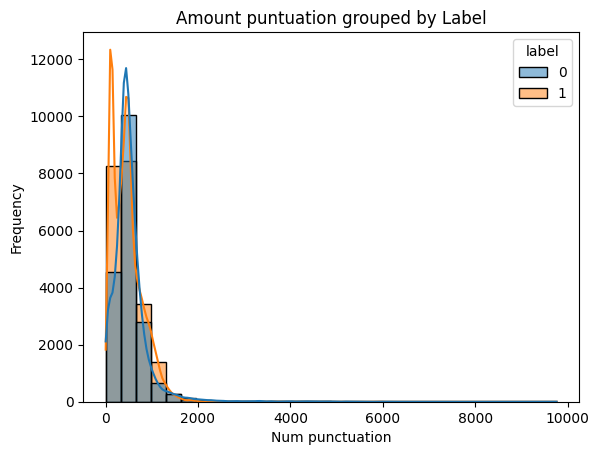

In [18]:
df['sentiment'] = df['content'].apply(lambda x : TextBlob(str(x)).sentiment.polarity)
sb.histplot(data=df, x='punctuation', hue = 'label', bins=30, kde=True)
plt.title("Amount puntuation grouped by Label")
plt.xlabel('Num punctuation')
plt.ylabel("Frequency")
plt.show()

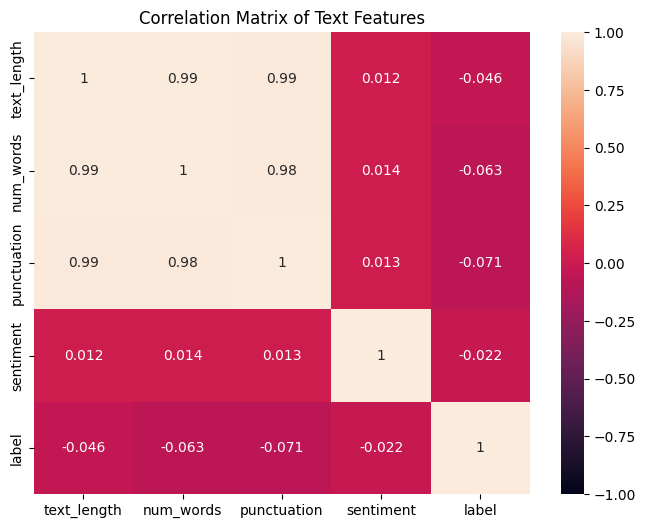

In [25]:
correlation_data = df[
    [
        'text_length', 
        'num_words', 
        'punctuation', 
        'sentiment',
        'label'
    ]
].corr()

# plot correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(data=correlation_data, 
            annot=True, 
            cbar=True, 
            vmin=-1, 
            vmax=1)
plt.title('Correlation Matrix of Text Features')
plt.show()

In [26]:
results = set()
df['content'].str.lower().str.split().apply(results.update)
print(results)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

